# Economic Housing Data: Analyzing Zillow's Economic Data & Predicting Impact on Housing Market

## This report will explore the following four questions:
- Q1: How has the median sales price of homes changed in Coastal Cities (eg. SF, NYC) vs. midwestern cities (eg. Chicago, Cincinnati)?
- Q2: How do the home value estimates (“Zestimates”) differ from the sales price? Is there a directional trend between the Zestimates and the sales price?
- Q3: Is there a correlation between home list price, the Zestimate, and median rental price?
- Q4: Can we predict the home value (either List Price of Rental Price) given information provided by Zillow’s economic data science team?

## 0. EDA

In [131]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import sklearn.metrics as skmetric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
import os

In [132]:
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

In [133]:
#load & examine the dataset
salesprice = pd.read_csv('Sale_Prices_Msa.csv')
zestimate = pd.read_csv('Metro_Zhvi_AllHomes.csv')
rentindex = pd.read_csv('Metro_Zri_AllHomes.csv', encoding="ISO-8859-1")
salesprice.head(10)

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,102001,United States,0,182300.0,179100.0,175100.0,172000.0,170800.0,170400.0,169600.0,...,231300.0,231900.0,232400.0,233100.0,233800.0,235900.0,239200.0,242100.0,245700.0,249700.0
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,392400.0,393700.0,394800.0,396100.0,398800.0,402900.0,408500.0,414100.0,416000.0,418300.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,471000.0,459300.0,443600.0,432300.0,417800.0,405500.0,390500.0,...,633200.0,631200.0,633500.0,637900.0,642100.0,644400.0,650700.0,658300.0,666900.0,677700.0
3,394463,"Chicago, IL",3,251500.0,246700.0,231800.0,220400.0,217600.0,219700.0,224200.0,...,232500.0,226500.0,222800.0,223300.0,224800.0,228000.0,229900.0,233900.0,234300.0,241400.0
4,394514,"Dallas-Fort Worth, TX",4,144600.0,144200.0,142700.0,142400.0,144500.0,146500.0,146600.0,...,251200.0,252700.0,254000.0,256000.0,258400.0,261300.0,263500.0,265400.0,268200.0,269300.0
5,394974,"Philadelphia, PA",5,212000.0,211900.0,207300.0,199800.0,195700.0,196100.0,198600.0,...,213500.0,215700.0,213000.0,213300.0,213700.0,215600.0,221900.0,225800.0,228200.0,NaN
6,394692,"Houston, TX",6,146200.0,144500.0,141700.0,142000.0,143300.0,144700.0,146700.0,...,229900.0,229400.0,227300.0,227000.0,227900.0,231000.0,233400.0,236900.0,239800.0,243600.0
7,395209,"Washington, DC",7,353600.0,342500.0,326600.0,313400.0,309900.0,308700.0,302000.0,...,394600.0,386700.0,387600.0,389000.0,392800.0,395400.0,403300.0,403000.0,401100.0,NaN
8,394856,"Miami-Fort Lauderdale, FL",8,253700.0,244500.0,236500.0,229500.0,225700.0,222800.0,214400.0,...,266200.0,266500.0,266700.0,269200.0,268100.0,271500.0,275500.0,279900.0,286200.0,291100.0
9,394347,"Atlanta, GA",9,161300.0,153800.0,148400.0,144800.0,143900.0,145400.0,144300.0,...,218300.0,219600.0,221500.0,221800.0,225200.0,226800.0,231900.0,233200.0,236500.0,NaN


In [134]:
zestimate.head(10)
#zestimate.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,102001,United States,0,106610.0,106752.0,106920.0,107086.0,107296.0,107511.0,107766.0,...,239846,240554,241306,242076,242866,243668,244457,245269,246132,247084
1,394913,"New York, NY",1,186859.0,186541.0,186250.0,186073.0,185981.0,186025.0,186149.0,...,479730,480102,480619,481078,481282,481284,481383,481869,482586,483379
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,184319.0,184292.0,184319.0,184419.0,184371.0,184258.0,184162.0,...,656726,657452,658846,661022,664378,667471,670216,674297,679491,687810
3,394463,"Chicago, IL",3,159576.0,158983.0,158663.0,158194.0,158752.0,159555.0,161184.0,...,239186,239419,239775,239988,240080,240087,240076,240166,240364,240595
4,394514,"Dallas-Fort Worth, TX",4,112128.0,112471.0,112719.0,112896.0,113116.0,113337.0,113672.0,...,250650,251160,251778,252424,253206,253643,253995,254102,254387,254821
5,394974,"Philadelphia, PA",5,118864.0,118702.0,118608.0,118564.0,118542.0,118583.0,118668.0,...,244033,244720,245543,246340,247011,247601,248094,248725,249398,250156
6,394692,"Houston, TX",6,109446.0,109585.0,109684.0,109722.0,109781.0,109947.0,110139.0,...,214925,215394,216018,216490,216836,217317,217832,218338,218469,218783
7,395209,"Washington, DC",7,177879.0,177760.0,177608.0,177444.0,177336.0,177358.0,177494.0,...,427570,428345,429158,430312,431718,433232,434703,435815,436685,437409
8,394856,"Miami-Fort Lauderdale, FL",8,111449.0,111667.0,111979.0,112293.0,112558.0,112669.0,112783.0,...,296223,296768,297171,297715,298352,299301,300021,300663,301550,303426
9,394347,"Atlanta, GA",9,120482.0,120961.0,121481.0,121944.0,122403.0,122837.0,123308.0,...,232832,233625,234399,235311,236193,237012,237816,238798,239923,241153


In [135]:
rentindex.head(10)
rentindex.describe()

,RegionID,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
count,782.000000,782.000000,691.000000,596.000000,655.000000,676.000000,696.000000,696.000000,693.000000,704.000000,...,760.000000,761.000000,761.000000,761.000000,762.000000,764.00000,677.000000,702.000000,759.000000,714.000000
mean,420109.225064,390.500000,1022.371925,1041.994966,1047.549618,1046.236686,1040.816092,1036.498563,1033.187590,1029.833807,...,1114.110526,1110.984231,1114.752957,1121.214192,1126.633858,1129.92801,1147.016248,1138.710826,1143.146245,1142.771709
std,94295.411901,225.888247,382.749548,410.890341,389.914889,390.451587,389.516310,390.653973,390.081201,389.607848,...,396.735219,382.926222,384.246144,397.490235,399.350637,400.59099,407.205469,403.633074,411.271025,395.297282
min,102001.000000,0.000000,647.000000,665.000000,668.000000,670.000000,672.000000,663.000000,659.000000,647.000000,...,600.000000,599.000000,598.000000,593.000000,584.000000,572.00000,568.000000,564.000000,560.000000,562.000000
25%,394551.500000,195.250000,840.000000,852.000000,864.000000,860.000000,857.000000,852.750000,849.000000,848.000000,...,869.000000,871.000000,872.000000,875.000000,879.250000,880.75000,886.000000,883.500000,887.500000,894.000000
50%,394802.500000,390.500000,954.000000,963.000000,979.000000,977.500000,970.500000,965.000000,961.000000,961.000000,...,990.500000,992.000000,997.000000,1001.000000,1004.500000,1011.00000,1024.000000,1016.500000,1015.000000,1018.000000
75%,395060.500000,585.750000,1112.000000,1129.250000,1141.000000,1137.500000,1137.250000,1134.000000,1129.000000,1123.250000,...,1251.750000,1250.000000,1262.000000,1272.000000,1279.000000,1282.00000,1304.000000,1298.000000,1295.000000,1297.750000
max,786265.000000,781.000000,8230.000000,8308.000000,8448.000000,8517.000000,8524.000000,8614.000000,8670.000000,8756.000000,...,4159.000000,3367.000000,3348.000000,3809.000000,3767.000000,3730.00000,3657.000000,4031.000000,3995.000000,3585.000000


## 1. Explore Median Sales Price of Homes in Different Regions
- Q1: How has the median sales price of homes changed in Coastal Cities (eg. SF, NYC) vs. midwestern cities (eg. Chicago, Cincinnati)?

In [136]:
#Add coastal label to select cities
salesprice['Coastal?'] = np.where((salesprice['RegionName'] == 'New York, NY') | (salesprice['RegionName'] == 'Los Angeles-Long Beach-Anaheim, CA') | (salesprice['RegionName'] == 'Washington, DC') | (salesprice['RegionName'] == 'Boston, MA') | (salesprice['RegionName'] == 'San Francisco, CA') | (salesprice['RegionName'] == 'Seattle, WA') | (salesprice['RegionName'] == 'San Diego, CA') | (salesprice['RegionName'] == 'Portland, OR') | (salesprice['RegionName'] == 'San Jose, CA'), 'Yes', 'No') 

In [137]:
#transpose axes for easier time series analysis & other data cleansing
salesprice1 = salesprice.T
salesprice1 = pd.DataFrame(data=salesprice1)
salesprice1
header_row = 1
salesprice1.columns = salesprice1.iloc[header_row]
salesprice1.drop('RegionID',inplace=True)
salesprice1.drop('RegionName',inplace=True)
salesprice1.drop('SizeRank',inplace=True)
salesprice1

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Hood River, OR","Beatrice, NE","Borger, TX","Prineville, OR","Carroll, IA","Storm Lake, IA","Woodward, OK","Los Alamos, NM","Spencer, IA","Spirit Lake, IA"
2008-03,182300,NaN,471000,251500,144600,212000,146200,353600,253700,161300,...,NaN,NaN,NaN,220300,NaN,NaN,NaN,NaN,NaN,NaN
2008-04,179100,NaN,459300,246700,144200,211900,144500,342500,244500,153800,...,NaN,NaN,NaN,213400,NaN,NaN,NaN,NaN,NaN,NaN
2008-05,175100,NaN,443600,231800,142700,207300,141700,326600,236500,148400,...,NaN,NaN,NaN,199400,NaN,NaN,NaN,NaN,NaN,NaN
2008-06,172000,NaN,432300,220400,142400,199800,142000,313400,229500,144800,...,NaN,NaN,NaN,186100,NaN,NaN,NaN,NaN,NaN,NaN
2008-07,170800,NaN,417800,217600,144500,195700,143300,309900,225700,143900,...,NaN,NaN,NaN,176400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11,239200,408500,650700,229900,263500,221900,233400,403300,275500,231900,...,403200,78000,78700,251100,120100,140800,128500,355800,128400,208000
2019-12,242100,414100,658300,233900,265400,225800,236900,403000,279900,233200,...,424000,80900,84700,259700,127800,130100,132700,340100,134500,207700
2020-01,245700,416000,666900,234300,268200,228200,239800,401100,286200,236500,...,408000,81500,95500,315200,152300,108900,108000,331800,135700,215400
2020-02,249700,418300,677700,241400,269300,NaN,243600,NaN,291100,NaN,...,468000,94400,NaN,313500,158500,119200,109200,386300,NaN,NaN


In [138]:
#further data cleansing
#salesprice1.year = salesprice.iloc[0].dt.year
salesprice1.reset_index(level=0,inplace=True)
#salesprice1.rename(columns={'index':'Date'},inplace=True)
#salesprice1.pivot(index=)
salesprice1.drop(index=144)

RegionName,index,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Hood River, OR","Beatrice, NE","Borger, TX","Prineville, OR","Carroll, IA","Storm Lake, IA","Woodward, OK","Los Alamos, NM","Spencer, IA","Spirit Lake, IA"
0,2008-03,182300,NaN,471000,251500,144600,212000,146200,353600,253700,...,NaN,NaN,NaN,220300,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-04,179100,NaN,459300,246700,144200,211900,144500,342500,244500,...,NaN,NaN,NaN,213400,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-05,175100,NaN,443600,231800,142700,207300,141700,326600,236500,...,NaN,NaN,NaN,199400,NaN,NaN,NaN,NaN,NaN,NaN
3,2008-06,172000,NaN,432300,220400,142400,199800,142000,313400,229500,...,NaN,NaN,NaN,186100,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-07,170800,NaN,417800,217600,144500,195700,143300,309900,225700,...,NaN,NaN,NaN,176400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019-10,235900,402900,644400,228000,261300,215600,231000,395400,271500,...,413200,87200,80900,257200,119300,134900,135900,380500,129400,203200
140,2019-11,239200,408500,650700,229900,263500,221900,233400,403300,275500,...,403200,78000,78700,251100,120100,140800,128500,355800,128400,208000
141,2019-12,242100,414100,658300,233900,265400,225800,236900,403000,279900,...,424000,80900,84700,259700,127800,130100,132700,340100,134500,207700
142,2020-01,245700,416000,666900,234300,268200,228200,239800,401100,286200,...,408000,81500,95500,315200,152300,108900,108000,331800,135700,215400


In [139]:
#complete data cleansing
coastal_salesprice = salesprice.groupby('Coastal?').mean()
#sns.lineplot(coastal_salesprice)
coastal_prices = coastal_salesprice.T.copy()
coastal_prices.reset_index(inplace=True)
coastal_prices.drop(index=[0,1],inplace=True)
#coastal_prices.index=pd.to_datetime(coastal_prices)
#coastal_prices.Date = coastal_prices.index.dt.year
transform = lambda x: x[:4]
coastal_prices['index'] = coastal_prices['index'].apply(transform)
coastal_prices

Coastal?,index,No,Yes
2,2008,176150.645161,429025.000000
3,2008,173765.806452,412675.000000
4,2008,170067.096774,397187.500000
5,2008,167449.354839,385325.000000
6,2008,165839.102564,376537.500000
...,...,...,...
141,2019,196871.921182,566966.666667
142,2019,198331.691297,573966.666667
143,2019,199770.578512,582088.888889
144,2020,202893.197279,587322.222222


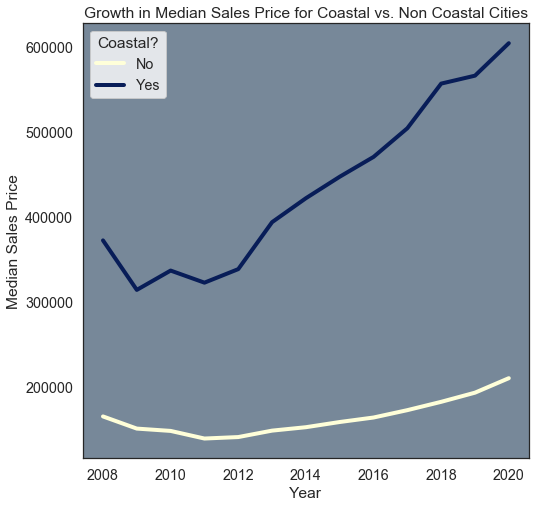

In [140]:
#Generate graph
yearly_coastal = coastal_prices.groupby('index').mean()
#sns.relplot(x=index, y="Sales Price", col="Coastal?",hue="event", kind="line",data=yearly_coastal)
ax = final_plot = yearly_coastal.plot(kind='line',figsize=(8,8), title='Growth in Median Sales Price for Coastal vs. Non Coastal Cities',
                                colormap='YlGnBu', markersize=30, lw=4)
ax.set_xlabel('Year')
ax.set_ylabel('Median Sales Price')
ax.set_facecolor("lightslategray")

## 2. Explore Variation between Zestimate and Sales Price
- Q2: How do the home value estimates differ from the sales price? Is there a directional trend between the estimates and the sales price?

In [141]:
salesprice2 = salesprice.copy()
zestimate2 = zestimate.copy()
salesprice2

,RegionID,RegionName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,Coastal?
0,102001,United States,0,182300.0,179100.0,175100.0,172000.0,170800.0,170400.0,169600.0,...,231900.0,232400.0,233100.0,233800.0,235900.0,239200.0,242100.0,245700.0,249700.0,No
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,393700.0,394800.0,396100.0,398800.0,402900.0,408500.0,414100.0,416000.0,418300.0,Yes
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,471000.0,459300.0,443600.0,432300.0,417800.0,405500.0,390500.0,...,631200.0,633500.0,637900.0,642100.0,644400.0,650700.0,658300.0,666900.0,677700.0,Yes
3,394463,"Chicago, IL",3,251500.0,246700.0,231800.0,220400.0,217600.0,219700.0,224200.0,...,226500.0,222800.0,223300.0,224800.0,228000.0,229900.0,233900.0,234300.0,241400.0,No
4,394514,"Dallas-Fort Worth, TX",4,144600.0,144200.0,142700.0,142400.0,144500.0,146500.0,146600.0,...,252700.0,254000.0,256000.0,258400.0,261300.0,263500.0,265400.0,268200.0,269300.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,395135,"Storm Lake, IA",618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124000.0,125800.0,119600.0,128400.0,134900.0,140800.0,130100.0,108900.0,119200.0,No
619,395236,"Woodward, OK",619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118600.0,113300.0,122900.0,121000.0,135900.0,128500.0,132700.0,108000.0,109200.0,No
620,394805,"Los Alamos, NM",620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,336800.0,353700.0,378400.0,372700.0,380500.0,355800.0,340100.0,331800.0,386300.0,No
621,395111,"Spencer, IA",621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131900.0,118500.0,129800.0,126800.0,129400.0,128400.0,134500.0,135700.0,NaN,No


In [142]:
#transpose columns and reset column headers
salesprice2 = salesprice2.T
salesprice2 = pd.DataFrame(data=salesprice2)
header_row = 1
salesprice2.columns = salesprice2.iloc[header_row]
salesprice2.reset_index()

RegionName,index,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Hood River, OR","Beatrice, NE","Borger, TX","Prineville, OR","Carroll, IA","Storm Lake, IA","Woodward, OK","Los Alamos, NM","Spencer, IA","Spirit Lake, IA"
0,RegionID,102001,394913,753899,394463,394514,394974,394692,395209,394856,...,394687,394371,394403,395004,786254,395135,395236,394805,395111,395112
1,RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Hood River, OR","Beatrice, NE","Borger, TX","Prineville, OR","Carroll, IA","Storm Lake, IA","Woodward, OK","Los Alamos, NM","Spencer, IA","Spirit Lake, IA"
2,SizeRank,0,1,2,3,4,5,6,7,8,...,613,614,615,616,617,618,619,620,621,622
3,2008-03,182300,NaN,471000,251500,144600,212000,146200,353600,253700,...,NaN,NaN,NaN,220300,NaN,NaN,NaN,NaN,NaN,NaN
4,2008-04,179100,NaN,459300,246700,144200,211900,144500,342500,244500,...,NaN,NaN,NaN,213400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2019-11,239200,408500,650700,229900,263500,221900,233400,403300,275500,...,403200,78000,78700,251100,120100,140800,128500,355800,128400,208000
144,2019-12,242100,414100,658300,233900,265400,225800,236900,403000,279900,...,424000,80900,84700,259700,127800,130100,132700,340100,134500,207700
145,2020-01,245700,416000,666900,234300,268200,228200,239800,401100,286200,...,408000,81500,95500,315200,152300,108900,108000,331800,135700,215400
146,2020-02,249700,418300,677700,241400,269300,NaN,243600,NaN,291100,...,468000,94400,NaN,313500,158500,119200,109200,386300,NaN,NaN


In [143]:
#drop superfluous columns 
salesprice2.rename(columns={'index':'Date'},inplace=True)
salesprice2.drop(index='SizeRank',inplace=True)
salesprice2.drop(index='RegionName',inplace=True)
salesprice2.drop(index='RegionID',inplace=True)

In [144]:
#get year from date value & set date to its own column
salesprice2.reset_index(inplace=True)
salesprice2.drop(index=144,inplace=True)
transform = lambda x: x[:4]
salesprice2['index'] = salesprice2['index'].apply(transform)
salesprice2

RegionName,index,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Hood River, OR","Beatrice, NE","Borger, TX","Prineville, OR","Carroll, IA","Storm Lake, IA","Woodward, OK","Los Alamos, NM","Spencer, IA","Spirit Lake, IA"
0,2008,182300,NaN,471000,251500,144600,212000,146200,353600,253700,...,NaN,NaN,NaN,220300,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,179100,NaN,459300,246700,144200,211900,144500,342500,244500,...,NaN,NaN,NaN,213400,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,175100,NaN,443600,231800,142700,207300,141700,326600,236500,...,NaN,NaN,NaN,199400,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,172000,NaN,432300,220400,142400,199800,142000,313400,229500,...,NaN,NaN,NaN,186100,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,170800,NaN,417800,217600,144500,195700,143300,309900,225700,...,NaN,NaN,NaN,176400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,235900,402900,644400,228000,261300,215600,231000,395400,271500,...,413200,87200,80900,257200,119300,134900,135900,380500,129400,203200
140,2019,239200,408500,650700,229900,263500,221900,233400,403300,275500,...,403200,78000,78700,251100,120100,140800,128500,355800,128400,208000
141,2019,242100,414100,658300,233900,265400,225800,236900,403000,279900,...,424000,80900,84700,259700,127800,130100,132700,340100,134500,207700
142,2020,245700,416000,666900,234300,268200,228200,239800,401100,286200,...,408000,81500,95500,315200,152300,108900,108000,331800,135700,215400


In [145]:
#drop NaN values (this will interfere with our average calculations)
salesprice2.dropna(axis=1,inplace=True)
salesprice2

RegionName,index,United States,"Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Houston, TX","Miami-Fort Lauderdale, FL","Boston, MA","San Francisco, CA","Riverside, CA",...,"Bardstown, KY","Lawrenceburg, TN","Montrose, CO","Ellensburg, WA","Berlin, NH","Astoria, OR","Hutchinson, MN","Martin, TN","Brevard, NC","Prineville, OR"
0,2008,182300,471000,251500,144600,146200,253700,333700,565500,301300,...,100200,71900,183100,217600,101900,257100,142500,64800,174100,220300
1,2008,179100,459300,246700,144200,144500,244500,327400,521900,285100,...,104200,67600,173500,233300,118700,281400,144600,61900,160200,213400
2,2008,175100,443600,231800,142700,141700,236500,323800,484000,268600,...,104600,59200,180400,235100,120300,295000,146100,58900,168600,199400
3,2008,172000,432300,220400,142400,142000,229500,320200,458800,257700,...,108300,60700,185300,236600,114900,287700,147400,53900,171800,186100
4,2008,170800,417800,217600,144500,143300,225700,319500,444700,246400,...,105700,62400,202100,232600,106000,244000,134100,58400,199300,176400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,235900,644400,228000,261300,231000,271500,448200,783700,371200,...,164200,101600,266200,366500,124700,322600,174500,84900,301500,257200
140,2019,239200,650700,229900,263500,233400,275500,449300,791600,370900,...,165500,112200,275500,317500,123900,343700,172600,76500,296600,251100
141,2019,242100,658300,233900,265400,236900,279900,454100,803900,369100,...,161600,123200,265200,325700,126200,339600,169600,74800,284600,259700
142,2020,245700,666900,234300,268200,239800,286200,453200,809600,373300,...,160200,136500,258200,326900,139700,355300,167400,71000,288300,315200


In [146]:
#drop unnecessary columns & calculate mean for each month
salesprice2.drop('United States', axis=1,inplace=True)
salesprice2.set_index('index',inplace=True)
salesprice2['mean'] = salesprice2.mean(axis=1)
salesprice2

RegionName,"Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Houston, TX","Miami-Fort Lauderdale, FL","Boston, MA","San Francisco, CA","Riverside, CA","Phoenix, AZ","Seattle, WA",...,"Lawrenceburg, TN","Montrose, CO","Ellensburg, WA","Berlin, NH","Astoria, OR","Hutchinson, MN","Martin, TN","Brevard, NC","Prineville, OR",mean
index,,,,,,,,,,,,,,,,,,,,,
2008,471000,251500,144600,146200,253700,333700,565500,301300,221300,348500,...,71900,183100,217600,101900,257100,142500,64800,174100,220300,186582.730924
2008,459300,246700,144200,144500,244500,327400,521900,285100,212200,342000,...,67600,173500,233300,118700,281400,144600,61900,160200,213400,183573.092369
2008,443600,231800,142700,141700,236500,323800,484000,268600,203600,330200,...,59200,180400,235100,120300,295000,146100,58900,168600,199400,179388.353414
2008,432300,220400,142400,142000,229500,320200,458800,257700,198600,321800,...,60700,185300,236600,114900,287700,147400,53900,171800,186100,176528.915663
2008,417800,217600,144500,143300,225700,319500,444700,246400,192200,314600,...,62400,202100,232600,106000,244000,134100,58400,199300,176400,174938.152610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,644400,228000,261300,231000,271500,448200,783700,371200,255100,465500,...,101600,266200,366500,124700,322600,174500,84900,301500,257200,237210.040161
2019,650700,229900,263500,233400,275500,449300,791600,370900,258900,469300,...,112200,275500,317500,123900,343700,172600,76500,296600,251100,239247.791165
2019,658300,233900,265400,236900,279900,454100,803900,369100,262700,479500,...,123200,265200,325700,126200,339600,169600,74800,284600,259700,241540.963855


In [147]:
#create new dataframe with mean price per year, across all cities with valid data (for sale price)
yearly_sales = salesprice2.copy()
#yearly_sales = yearly_sales[yearly_sales['mean']]
yearly_sales = yearly_sales[['mean']]
yearly_sales.reset_index(inplace=True)
yearly_sales_final = pd.DataFrame(yearly_sales['mean'].groupby(yearly_sales['index']).mean())
yearly_sales_final.rename(columns = {'mean': 'Sales Mean'}, inplace=True)
yearly_sales_final

,Sales Mean
index,
2008,174352.329317
2009,158367.369478
2010,156872.824632
2011,147947.757697
2012,151500.401606
2013,163612.516734
2014,171773.795181
2015,182558.032129
2016,192783.500669


In [148]:
#transpose columns and reset column headers
zestimate2 = zestimate2.T
zestimate2 = pd.DataFrame(data=zestimate2)
header_row = 1
zestimate2.columns = zestimate2.iloc[header_row]
zestimate2.reset_index()

RegionName,index,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
0,RegionID,102001,394913,753899,394463,394514,394974,394692,395209,394856,...,753927,395142,394330,753929,395186,394767,753874,394968,395188,394743
1,RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
2,SizeRank,0,1,2,3,4,5,6,7,8,...,904,905,906,907,908,909,910,911,912,913
3,1996-04,106610,186859,184319,159576,112128,118864,109446,177879,111449,...,NaN,NaN,NaN,NaN,NaN,NaN,63352,NaN,NaN,NaN
4,1996-05,106752,186541,184292,158983,112471,118702,109585,177760,111667,...,NaN,NaN,NaN,NaN,NaN,NaN,63688,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-10,243668,481284,667471,240087,253643,247601,217317,433232,299301,...,243991,75583,164998,93157,175376,72583,194204,103985,70322,304341
286,2019-11,244457,481383,670216,240076,253995,248094,217832,434703,300021,...,243519,75657,165831,92999,176243,72858,193883,104900,70287,305215
287,2019-12,245269,481869,674297,240166,254102,248725,218338,435815,300663,...,243037,75526,166648,92586,177190,73044,193353,105909,70313,305688
288,2020-01,246132,482586,679491,240364,254387,249398,218469,436685,301550,...,242359,75371,167361,92143,178268,73143,192744,107562,70187,305999


In [149]:
#drop superfluous columns 
zestimate2.rename(columns={'index':'Date'},inplace=True)
zestimate2.drop(index='SizeRank',inplace=True)
zestimate2.drop(index='RegionName',inplace=True)
zestimate2.drop(index='RegionID',inplace=True)

In [150]:
#get year from date value & set date to its own column
zestimate2.reset_index(inplace=True)
zestimate2.drop(index=144,inplace=True)
transform = lambda x: x[:4]
zestimate2['index'] = zestimate2['index'].apply(transform)
zestimate2

RegionName,index,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
0,1996,106610,186859,184319,159576,112128,118864,109446,177879,111449,...,NaN,NaN,NaN,NaN,NaN,NaN,63352,NaN,NaN,NaN
1,1996,106752,186541,184292,158983,112471,118702,109585,177760,111667,...,NaN,NaN,NaN,NaN,NaN,NaN,63688,NaN,NaN,NaN
2,1996,106920,186250,184319,158663,112719,118608,109684,177608,111979,...,NaN,NaN,NaN,NaN,NaN,NaN,63986,NaN,NaN,NaN
3,1996,107086,186073,184419,158194,112896,118564,109722,177444,112293,...,NaN,NaN,NaN,NaN,NaN,NaN,64322,NaN,NaN,NaN
4,1996,107296,185981,184371,158752,113116,118542,109781,177336,112558,...,NaN,NaN,NaN,NaN,NaN,NaN,64786,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2019,243668,481284,667471,240087,253643,247601,217317,433232,299301,...,243991,75583,164998,93157,175376,72583,194204,103985,70322,304341
283,2019,244457,481383,670216,240076,253995,248094,217832,434703,300021,...,243519,75657,165831,92999,176243,72858,193883,104900,70287,305215
284,2019,245269,481869,674297,240166,254102,248725,218338,435815,300663,...,243037,75526,166648,92586,177190,73044,193353,105909,70313,305688
285,2020,246132,482586,679491,240364,254387,249398,218469,436685,301550,...,242359,75371,167361,92143,178268,73143,192744,107562,70187,305999


In [151]:
#drop NaN values (this will interfere with our average calculations)
zestimate2.dropna(axis=1,inplace=True)
zestimate2

RegionName,index,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Brookings, OR","Hood River, OR","Elk City, OK","Prineville, OR","Storm Lake, IA","Woodward, OK","Fitzgerald, GA","Huron, SD","Vineyard Haven, MA","Craig, CO"
0,1996,106610,186859,184319,159576,112128,118864,109446,177879,111449,...,139614,136150,49126,109447,62652,41447,48740,39559,219482,63352
1,1996,106752,186541,184292,158983,112471,118702,109585,177760,111667,...,139828,137088,49231,109789,62735,41691,48802,39462,219916,63688
2,1996,106920,186250,184319,158663,112719,118608,109684,177608,111979,...,140119,137929,49449,110105,62758,41879,48802,39472,220662,63986
3,1996,107086,186073,184419,158194,112896,118564,109722,177444,112293,...,140433,138396,49625,110419,62795,42091,48852,39487,221333,64322
4,1996,107296,185981,184371,158752,113116,118542,109781,177336,112558,...,140888,139069,49817,110906,62843,42245,48960,39498,222100,64786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2019,243668,481284,667471,240087,253643,247601,217317,433232,299301,...,334192,464146,108104,264583,123114,108600,82392,127960,844801,194204
283,2019,244457,481383,670216,240076,253995,248094,217832,434703,300021,...,334647,465111,108520,265839,123680,109204,82369,128189,846872,193883
284,2019,245269,481869,674297,240166,254102,248725,218338,435815,300663,...,334976,466050,108989,267057,124126,109875,82149,128207,849068,193353
285,2020,246132,482586,679491,240364,254387,249398,218469,436685,301550,...,335743,466704,109624,268222,124471,110673,81706,128057,851367,192744


In [152]:
#drop unnecessary columns & calculate mean for each month
zestimate2.drop('United States', axis=1,inplace=True)
zestimate2.set_index('index',inplace=True)
zestimate2['mean'] = zestimate2.mean(axis=1)
zestimate2

RegionName,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA","Boston, MA",...,"Hood River, OR","Elk City, OK","Prineville, OR","Storm Lake, IA","Woodward, OK","Fitzgerald, GA","Huron, SD","Vineyard Haven, MA","Craig, CO",mean
index,,,,,,,,,,,,,,,,,,,,,
1996,186859,184319,159576,112128,118864,109446,177879,111449,120482,166211,...,136150,49126,109447,62652,41447,48740,39559,219482,63352,91386.990741
1996,186541,184292,158983,112471,118702,109585,177760,111667,120961,166574,...,137088,49231,109789,62735,41691,48802,39462,219916,63688,91561.671296
1996,186250,184319,158663,112719,118608,109684,177608,111979,121481,166976,...,137929,49449,110105,62758,41879,48802,39472,220662,63986,91740.296296
1996,186073,184419,158194,112896,118564,109722,177444,112293,121944,167604,...,138396,49625,110419,62795,42091,48852,39487,221333,64322,91922.400463
1996,185981,184371,158752,113116,118542,109781,177336,112558,122403,168299,...,139069,49817,110906,62843,42245,48960,39498,222100,64786,92144.296296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,481284,667471,240087,253643,247601,217317,433232,299301,237012,486390,...,464146,108104,264583,123114,108600,82392,127960,844801,194204,204591.321759
2019,481383,670216,240076,253995,248094,217832,434703,300021,237816,487415,...,465111,108520,265839,123680,109204,82369,128189,846872,193883,205250.173611
2019,481869,674297,240166,254102,248725,218338,435815,300663,238798,488465,...,466050,108989,267057,124126,109875,82149,128207,849068,193353,205962.516204


In [153]:
#create new dataframe with mean price per year, across all cities with valid data (for Zestimate)
yearly_zestimate = zestimate2.copy()
#yearly_sales = yearly_sales[yearly_sales['mean']]
yearly_zestimate = yearly_zestimate[['mean']]
yearly_zestimate.reset_index(inplace=True)
yearly_zestimate_final = pd.DataFrame(yearly_zestimate['mean'].groupby(yearly_zestimate['index']).mean())
yearly_zestimate_final.rename(columns = {'mean': 'Zestimate Mean'}, inplace=True)
yearly_zestimate_final

,Zestimate Mean
index,
1996,92186.487397
1997,95121.582755
1998,99637.831404
1999,104589.672261
2000,111523.095486
2001,119602.847994
2002,126634.110340
2003,135322.758873
2004,147806.033372


In [154]:
yearly_sales_final

,Sales Mean
index,
2008,174352.329317
2009,158367.369478
2010,156872.824632
2011,147947.757697
2012,151500.401606
2013,163612.516734
2014,171773.795181
2015,182558.032129
2016,192783.500669


In [155]:
#merge mean price from zestimate and sales prices
merged_yearly_data = yearly_sales_final.merge(yearly_zestimate_final, left_index=True, right_index=True) 
merged_yearly_data

,Sales Mean,Zestimate Mean
index,,
2008,174352.329317,170099.073443
2009,158367.369478,157156.287423
2010,156872.824632,151815.389660
2011,147947.757697,144570.302276
2012,151500.401606,143084.329282
2013,163612.516734,150668.136188
2014,171773.795181,158789.544946
2015,182558.032129,165793.504630
2016,192783.500669,173835.111304


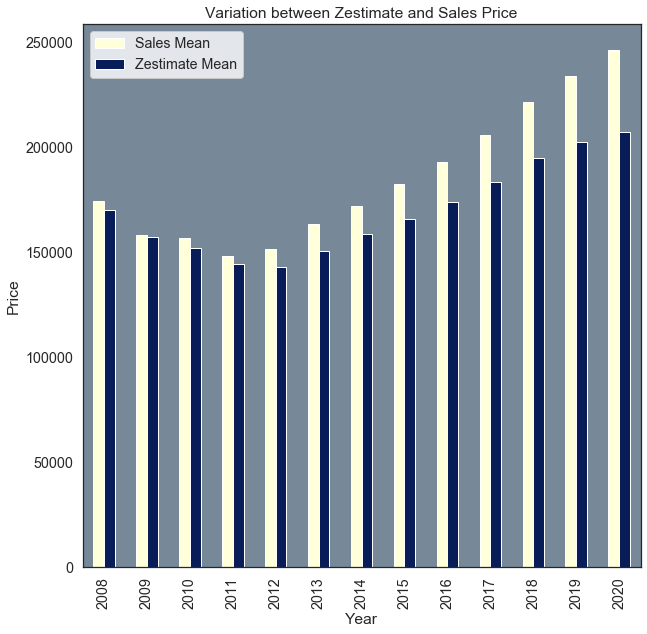

In [156]:
#create plot to visualize differences in prices
ax = merged_yearly_data.plot(kind = "bar",figsize=(10,10), title="Variation between Zestimate and Sales Price",
                            colormap='YlGnBu')
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_facecolor("lightslategray")

In [166]:
## look at differences for major cities -
#see if there is any difference between the prices in SF, New York, Ann Arbor, and Little Rock, for example
zestimate_sample = zestimate2.copy()
sales_sample = salesprice2.copy()
sales_sample.reset_index(inplace=True)
zestimate_sample.reset_index(inplace=True)

In [167]:
sales_sample

RegionName,index,"Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Houston, TX","Miami-Fort Lauderdale, FL","Boston, MA","San Francisco, CA","Riverside, CA","Phoenix, AZ",...,"Lawrenceburg, TN","Montrose, CO","Ellensburg, WA","Berlin, NH","Astoria, OR","Hutchinson, MN","Martin, TN","Brevard, NC","Prineville, OR",mean
0,2008,471000,251500,144600,146200,253700,333700,565500,301300,221300,...,71900,183100,217600,101900,257100,142500,64800,174100,220300,186582.730924
1,2008,459300,246700,144200,144500,244500,327400,521900,285100,212200,...,67600,173500,233300,118700,281400,144600,61900,160200,213400,183573.092369
2,2008,443600,231800,142700,141700,236500,323800,484000,268600,203600,...,59200,180400,235100,120300,295000,146100,58900,168600,199400,179388.353414
3,2008,432300,220400,142400,142000,229500,320200,458800,257700,198600,...,60700,185300,236600,114900,287700,147400,53900,171800,186100,176528.915663
4,2008,417800,217600,144500,143300,225700,319500,444700,246400,192200,...,62400,202100,232600,106000,244000,134100,58400,199300,176400,174938.152610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,644400,228000,261300,231000,271500,448200,783700,371200,255100,...,101600,266200,366500,124700,322600,174500,84900,301500,257200,237210.040161
140,2019,650700,229900,263500,233400,275500,449300,791600,370900,258900,...,112200,275500,317500,123900,343700,172600,76500,296600,251100,239247.791165
141,2019,658300,233900,265400,236900,279900,454100,803900,369100,262700,...,123200,265200,325700,126200,339600,169600,74800,284600,259700,241540.963855
142,2020,666900,234300,268200,239800,286200,453200,809600,373300,267300,...,136500,258200,326900,139700,355300,167400,71000,288300,315200,244336.546185


In [168]:
zestimate_sample

RegionName,index,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Hood River, OR","Elk City, OK","Prineville, OR","Storm Lake, IA","Woodward, OK","Fitzgerald, GA","Huron, SD","Vineyard Haven, MA","Craig, CO",mean
0,1996,186859,184319,159576,112128,118864,109446,177879,111449,120482,...,136150,49126,109447,62652,41447,48740,39559,219482,63352,91386.990741
1,1996,186541,184292,158983,112471,118702,109585,177760,111667,120961,...,137088,49231,109789,62735,41691,48802,39462,219916,63688,91561.671296
2,1996,186250,184319,158663,112719,118608,109684,177608,111979,121481,...,137929,49449,110105,62758,41879,48802,39472,220662,63986,91740.296296
3,1996,186073,184419,158194,112896,118564,109722,177444,112293,121944,...,138396,49625,110419,62795,42091,48852,39487,221333,64322,91922.400463
4,1996,185981,184371,158752,113116,118542,109781,177336,112558,122403,...,139069,49817,110906,62843,42245,48960,39498,222100,64786,92144.296296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2019,481284,667471,240087,253643,247601,217317,433232,299301,237012,...,464146,108104,264583,123114,108600,82392,127960,844801,194204,204591.321759
282,2019,481383,670216,240076,253995,248094,217832,434703,300021,237816,...,465111,108520,265839,123680,109204,82369,128189,846872,193883,205250.173611
283,2019,481869,674297,240166,254102,248725,218338,435815,300663,238798,...,466050,108989,267057,124126,109875,82149,128207,849068,193353,205962.516204
284,2020,482586,679491,240364,254387,249398,218469,436685,301550,239923,...,466704,109624,268222,124471,110673,81706,128057,851367,192744,206754.425926


In [169]:
zestimate_sample = zestimate_sample[['index', 'Chicago, IL', 'San Francisco, CA', 'Phoenix, AZ', 'Ann Arbor, MI']]
sales_sample = sales_sample[['index','Chicago, IL', 'San Francisco, CA', 'Phoenix, AZ', 'Ann Arbor, MI']]

In [170]:
zestimate_sample = zestimate_sample.rename(columns={'Chicago, IL': 'Chicago_Zest', 'San Francisco, CA': 'SF_Zest', 'Phoenix, AZ': 'Phoenix_Zest', 'Ann Arbor, MI': 'AA_Zest'})
sales_sample = sales_sample.rename(columns={'Chicago, IL': 'Chicago_Sales', 'San Francisco, CA': 'SF_Sales', 'Phoenix, AZ': 'Phoenix_Sales', 'Ann Arbor, MI': 'AA_Sales'})
zestimate_sample['Zest'] = 1
sales_sample['Zest'] = 0

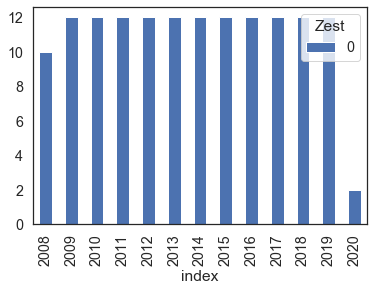

In [171]:
sales_sample
sales_sample.groupby(["index","Zest"]).size().unstack().plot(kind = "bar", stacked = True)

In [172]:
## create separate dataframe for each city (eg. Chicago), then calculate mean for each decase
#then, merge zest with sales &
#repeat for each city
#create side by side plot to see differences between cities

In [173]:
#merge zestimate & sales data; separate into select cities 
merged_sample_data = sales_sample.merge(zestimate_sample, left_index=True, right_index=True) 
merged_chicago = merged_sample_data[['index_x', 'Chicago_Sales', 'Chicago_Zest']]
merged_sf = merged_sample_data[['index_x', 'SF_Sales', 'SF_Zest']]
merged_phoenix = merged_sample_data[['index_x', 'Phoenix_Sales', 'Phoenix_Zest']]
merged_annarbor = merged_sample_data[['index_x', 'AA_Sales', 'AA_Zest']]

In [174]:
merged_sample_data.astype(int).describe()

RegionName,index_x,Chicago_Sales,SF_Sales,Phoenix_Sales,AA_Sales,Zest_x,index_y,Chicago_Zest,SF_Zest,Phoenix_Zest,AA_Zest,Zest_y
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.0
mean,2013.666667,190232.638889,544903.472222,170591.666667,194784.027778,0.0,2001.750000,205963.986111,493977.215278,182404.236111,205013.458333,1.0
std,3.484230,24118.199117,162622.560307,46664.398463,44149.899877,0.0,3.491248,44037.697387,184775.027247,57759.802034,34887.395365,0.0
min,2008.000000,152100.000000,275500.000000,105200.000000,125900.000000,0.0,1996.000000,147032.000000,244936.000000,116884.000000,139843.000000,1.0
25%,2011.000000,177225.000000,379725.000000,126575.000000,152575.000000,0.0,1999.000000,163631.500000,313282.000000,136421.000000,170963.750000,1.0
50%,2014.000000,188650.000000,565550.000000,161350.000000,192650.000000,0.0,2002.000000,199013.000000,469134.000000,162251.500000,214823.000000,1.0
75%,2017.000000,207250.000000,677175.000000,206050.000000,236650.000000,0.0,2005.000000,248202.000000,691828.500000,221420.250000,236928.000000,1.0
max,2020.000000,251500.000000,816600.000000,274300.000000,274000.000000,0.0,2008.000000,275282.000000,774532.000000,297115.000000,248844.000000,1.0


In [175]:
#calculate mean sales & zest for each year
merged_sf_final = merged_sf.astype(int).groupby('index_x').mean()
merged_chicago_final = merged_chicago.astype(int).groupby('index_x').mean()
merged_phx_final = merged_phoenix.astype(int).groupby('index_x').mean()
merged_aa_final = merged_annarbor.astype(int).groupby('index_x').mean()
merged_aa_final

RegionName,AA_Sales,AA_Zest
index_x,,
2008,175890.000000,144632.900000
2009,138983.333333,154362.166667
2010,144425.000000,164049.500000
2011,145383.333333,175138.916667
2012,155508.333333,191013.750000
2013,180516.666667,209040.750000
2014,192683.333333,222032.833333
2015,208166.666667,232644.583333
2016,220325.000000,240543.416667


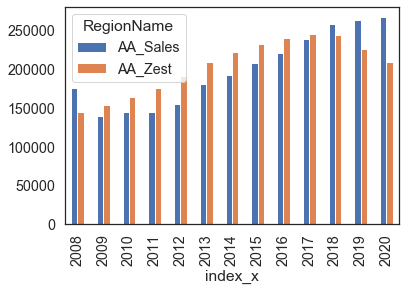

In [176]:
#sample plot to evaluate differences
merged_aa_final.plot(kind='bar')

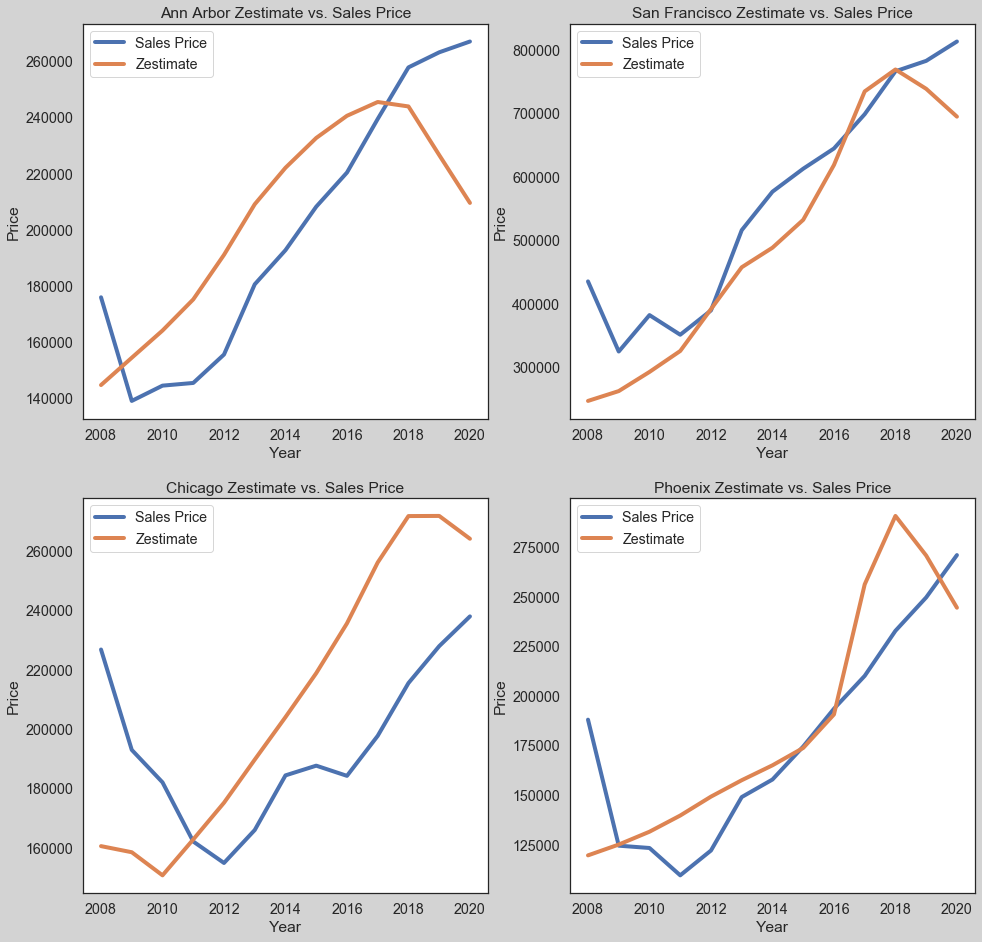

In [177]:
#generate final plot for presentation
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,16),facecolor="lightgray")

ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.plot(merged_aa_final,lw=4)
ax1.set_title('Ann Arbor Zestimate vs. Sales Price')
ax1.legend(['Sales Price', 'Zestimate'],loc='upper left')

ax2.set_xlabel('Year')
ax2.set_ylabel('Price')
ax2.plot(merged_sf_final, lw=4)
ax2.set_title('San Francisco Zestimate vs. Sales Price')
ax2.legend(['Sales Price', 'Zestimate'],loc='upper left')

ax3.set_xlabel('Year')
ax3.set_ylabel('Price')
ax3.plot(merged_chicago_final, lw=4)
ax3.set_title('Chicago Zestimate vs. Sales Price')
ax3.legend(['Sales Price', 'Zestimate'],loc='upper left')

ax4.set_xlabel('Year')
ax4.set_ylabel('Price')
ax4.plot(merged_phx_final, lw=4)
ax4.set_title('Phoenix Zestimate vs. Sales Price')
ax4.legend(['Sales Price', 'Zestimate'],loc='upper left')

plt.show()

## 3. Explore Relationship between Zestimate and Rental Price 

- Q3: Is there a correlation between home list price, the Zestimate, and median rental price?

In [178]:
## look at stats info for this - run ANOVA to see if there is correlation & how strong that correlation is (expect it to be high)

In [179]:
#read in state time series data & create copy for analysis
statedata = pd.read_csv('zecon/State_time_series.csv')
statedata.columns
statedata_final = statedata.copy()

In [180]:
#filter for relevant columns & reformat date to year
statedata_final = statedata_final[['Date', 'RegionName', 'MedianListingPricePerSqft_AllHomes', 'MedianListingPrice_AllHomes', 'MedianRentalPricePerSqft_AllHomes', 'MedianRentalPrice_AllHomes', 'ZHVIPerSqft_AllHomes', 'ZHVI_AllHomes', 'ZRI_AllHomes', 'ZriPerSqft_AllHomes']]
statedata_final.Date = pd.to_datetime(statedata_final.Date)
statedata_final['Year'] = statedata_final.Date.dt.year
statedata_final.drop('Date',axis=1,inplace=True)

In [181]:
statedata_final

,RegionName,MedianListingPricePerSqft_AllHomes,MedianListingPrice_AllHomes,MedianRentalPricePerSqft_AllHomes,MedianRentalPrice_AllHomes,ZHVIPerSqft_AllHomes,ZHVI_AllHomes,ZRI_AllHomes,ZriPerSqft_AllHomes,Year
0,Alabama,NaN,NaN,NaN,NaN,50.0,79500.0,NaN,NaN,1996
1,Arizona,NaN,NaN,NaN,NaN,62.0,103600.0,NaN,NaN,1996
2,Arkansas,NaN,NaN,NaN,NaN,42.0,64400.0,NaN,NaN,1996
3,California,NaN,NaN,NaN,NaN,102.0,157900.0,NaN,NaN,1996
4,Colorado,NaN,NaN,NaN,NaN,82.0,128100.0,NaN,NaN,1996
...,...,...,...,...,...,...,...,...,...,...
13207,Virginia,147.928994,289000.0,1.068376,1600.0,147.0,246200.0,1538.0,0.948,2017
13208,Washington,201.418209,349950.0,1.268182,1900.0,212.0,351300.0,1842.0,1.132,2017
13209,WestVirginia,89.392679,149900.0,0.746074,980.0,74.0,103500.0,858.0,0.674,2017
13210,Wisconsin,128.536977,189900.0,0.983717,1150.0,116.0,169300.0,1179.0,0.920,2017


In [182]:
#drop rows with NaNs
statedata_final.dropna(axis=0,inplace=True)
statedata_final_sqft = statedata_final[['RegionName', 'MedianListingPricePerSqft_AllHomes', 'MedianRentalPricePerSqft_AllHomes', 'ZHVIPerSqft_AllHomes', 'ZriPerSqft_AllHomes', 'Year']]
statedata_final_price = statedata_final[['RegionName', 'MedianListingPrice_AllHomes', 'MedianRentalPrice_AllHomes', 'ZHVI_AllHomes', 'ZRI_AllHomes', 'Year']]

In [183]:
#rename columns to make data more digestible 
statedata_final_sqft.rename(columns={'MedianListingPricePerSqft_AllHomes': 'List_Price', 'MedianRentalPricePerSqft_AllHomes': 'Rental_Price', 'ZHVIPerSqft_AllHomes': 'ZHVI', 'ZriPerSqft_AllHomes': 'ZRI' },inplace=True)
statedata_final_price.rename(columns={'MedianListingPrice_AllHomes': 'List_Price', 'MedianRentalPrice_AllHomes': 'Rental_Price', 'ZHVI_AllHomes': 'ZHVI', 'ZRI_AllHomes': 'ZRI'},inplace=True)
statedata_final_price

,RegionName,List_Price,Rental_Price,ZHVI,ZRI,Year
8741,Alabama,158900.0,975.0,114700.0,949.0,2010
8744,Arkansas,139900.0,875.0,104500.0,799.0,2010
8747,Connecticut,279000.0,1700.0,246100.0,1662.0,2010
8749,DistrictofColumbia,307000.0,2150.0,363700.0,2199.0,2010
8755,Indiana,123500.0,1150.0,112500.0,1004.0,2010
...,...,...,...,...,...,...
13207,Virginia,289000.0,1600.0,246200.0,1538.0,2017
13208,Washington,349950.0,1900.0,351300.0,1842.0,2017
13209,WestVirginia,149900.0,980.0,103500.0,858.0,2017
13210,Wisconsin,189900.0,1150.0,169300.0,1179.0,2017


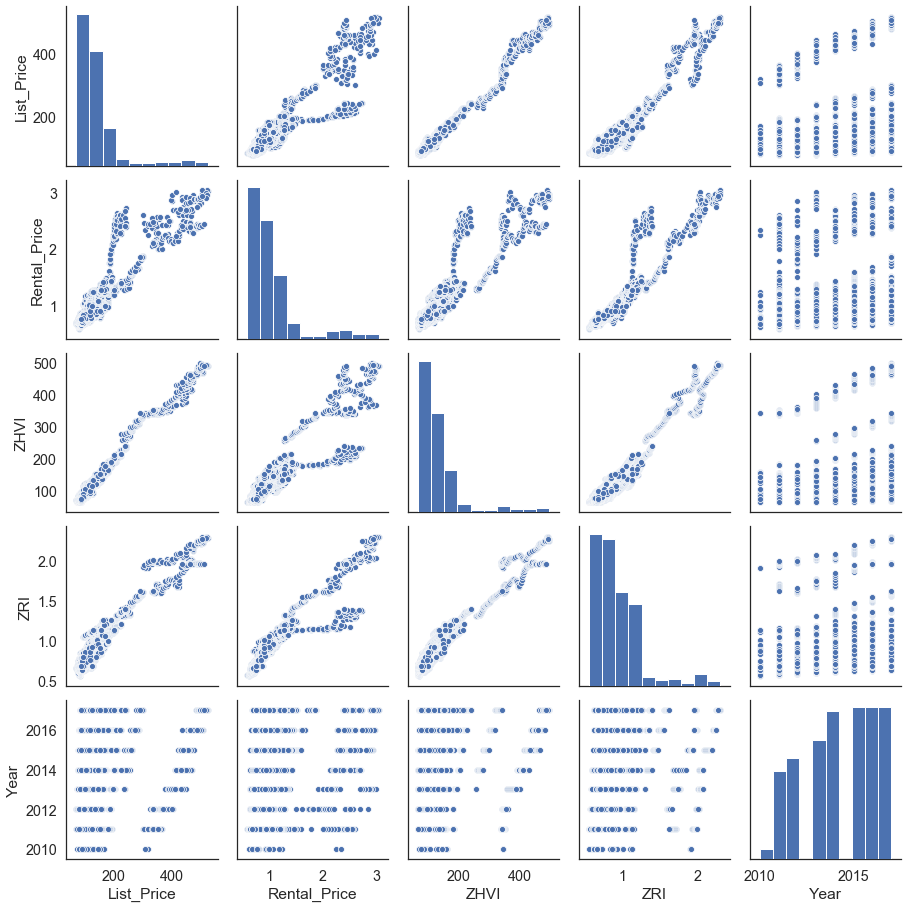

In [184]:
sns.pairplot(statedata_final_sqft)

Text(0.5, 1.02, 'Pair Plot of List Price, Rental Price, ZRI, and Zestimate for US Homes throughough 2010s')

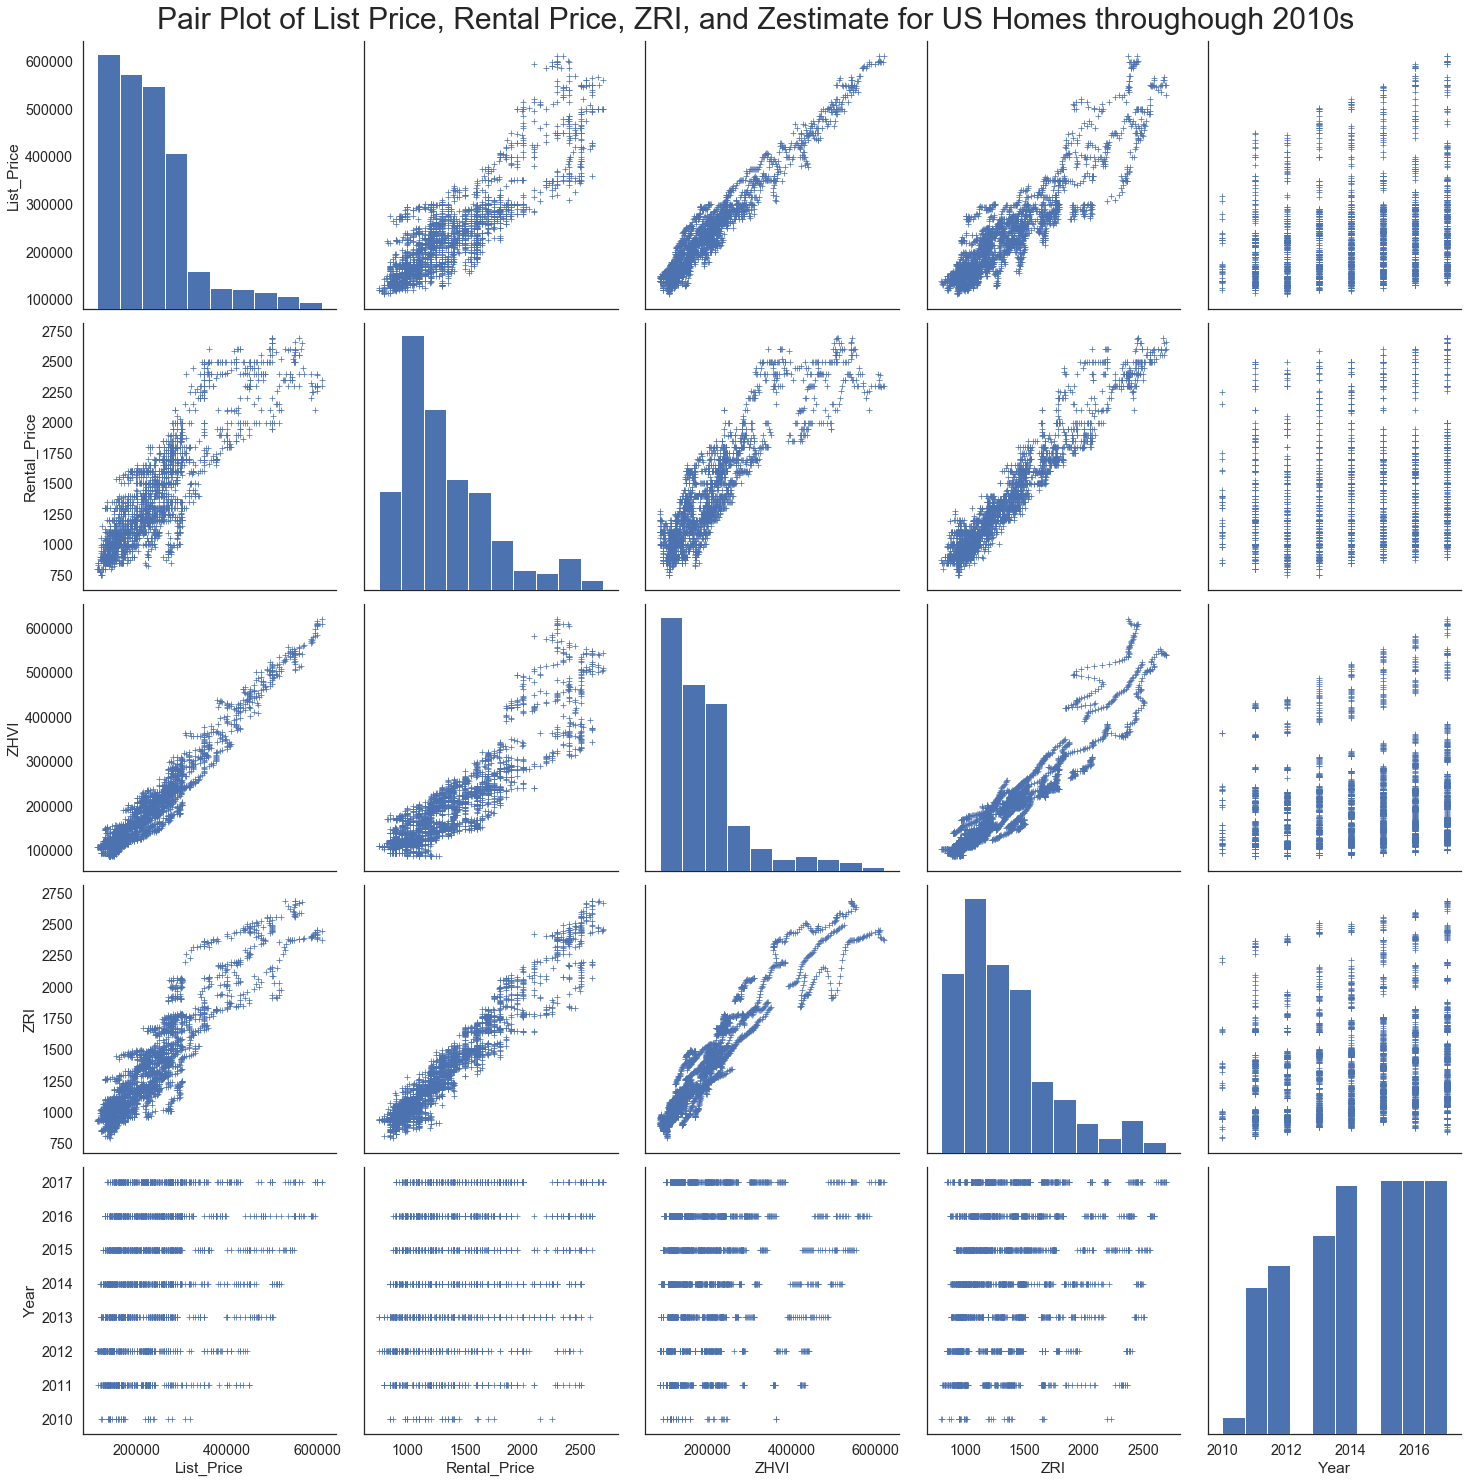

In [185]:
sns.pairplot(statedata_final_price, size=4, markers='+')
plt.suptitle('Pair Plot of List Price, Rental Price, ZRI, and Zestimate for US Homes throughough 2010s',size=30,y=1.02)

In [186]:
prices_by_state = statedata_final_price.groupby(['RegionName', 'Year']).mean().reset_index()
#sns.pairplot(prices_by_state)
prices_by_state

,RegionName,Year,List_Price,Rental_Price,ZHVI,ZRI
0,Alabama,2010,156950.000000,975.000000,114850.000000,949.500000
1,Alabama,2011,155533.333333,980.791667,115616.666667,938.666667
2,Alabama,2012,150933.333333,881.208333,116283.333333,934.166667
3,Alabama,2013,164933.333333,866.958333,116025.000000,938.500000
4,Alabama,2014,170029.166667,918.333333,117450.000000,943.666667
...,...,...,...,...,...,...
292,Wisconsin,2017,190650.000000,1181.666667,165925.000000,1184.500000
293,Wyoming,2014,237757.142857,1183.214286,181500.000000,1182.000000
294,Wyoming,2015,237508.333333,1210.000000,187166.666667,1308.500000
295,Wyoming,2016,238861.666667,1120.208333,193033.333333,1265.500000


In [187]:
#evaluate relationship between Zestimate (ZHVI) per sq ft and Rental Price Index (ZRI) per sq ft
model1 = smf.ols('ZHVI ~ ZRI', data=statedata_final_sqft).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ZHVI   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 3.520e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:22:03   Log-Likelihood:                -14554.
No. Observations:                3205   AIC:                         2.911e+04
Df Residuals:                    3203   BIC:                         2.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -92.6941      1.271    -72.935      0.000     -95.186     -90.202
ZRI          242.1803      1.291    187.626      0.000     239.650     244.711
==============================================================================
Omnibus:                      118.646   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.533
Skew:                           0.328   Prob(JB):                     2.57e-42
Kurtosis:                       4.002   Cond. No.                         6.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#evaluate relationship between List Price per sq ft and average rental prices per sq ft
model2 = smf.ols('List_Price ~ Rental_Price', data=statedata_final_sqft).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             List_Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 1.595e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:22:03   Log-Likelihood:                -15602.
No. Observations:                3205   AIC:                         3.121e+04
Df Residuals:                    3203   BIC:                         3.122e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.9695      1.372    -11.637      0.000     -18.660     -13.279
Rental_Price   152.3495      1.206    126.302      0.000     149.984     154.715
==============================================================================
Omnibus:                      677.608   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8366.816
Skew:                          -0.643   Prob(JB):                         0.00
Kurtosis:                      10.810   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
#evaluate relationship between Zestimate (ZHVI) and average rental prices
model3 = smf.ols('ZHVI ~ ZRI', data=statedata_final_price).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ZHVI   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 2.410e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:22:03   Log-Likelihood:                -37885.
No. Observations:                3205   AIC:                         7.577e+04
Df Residuals:                    3203   BIC:                         7.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.151e+05   2076.009    -55.425      0.000   -1.19e+05   -1.11e+05
ZRI          232.2726      1.496    155.240      0.000     229.339     235.206
==============================================================================
Omnibus:                      727.389   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3121.115
Skew:                           1.042   Prob(JB):                         0.00
Kurtosis:                       7.362   Cond. No.                     4.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
#evaluate relationship between List Price and average rental prices 
model2 = smf.ols('List_Price ~ Rental_Price', data=statedata_final_price).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             List_Price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:22:03   Log-Likelihood:                -38808.
No. Observations:                3205   AIC:                         7.762e+04
Df Residuals:                    3203   BIC:                         7.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.699e+04   2631.813    -10.255      0.000   -3.21e+04   -2.18e+04
Rental_Price   191.4625      1.883    101.659      0.000     187.770     195.155
==============================================================================
Omnibus:                      487.765   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.878
Skew:                           0.912   Prob(JB):                    1.39e-219
Kurtosis:                       5.054   Cond. No.                     4.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
#generate more granular sample to see if results vary by region
washington_data = prices_by_state[prices_by_state.RegionName == 'Washington']
michigan_data = prices_by_state[prices_by_state.RegionName == 'Michigan']
mass_data = prices_by_state[prices_by_state.RegionName == 'Massachusetts']
georgia_data = prices_by_state[prices_by_state.RegionName == 'Georgia']
washington_data

,RegionName,Year,List_Price,Rental_Price,ZHVI,ZRI
272,Washington,2010,227470.000000,1422.500000,234600.000000,1359.500000
273,Washington,2011,215299.166667,1391.666667,224500.000000,1378.750000
274,Washington,2012,217015.250000,1322.166667,220766.666667,1379.250000
275,Washington,2013,254820.833333,1373.750000,237608.333333,1423.916667
276,Washington,2014,267758.333333,1474.791667,252783.333333,1483.583333
277,Washington,2015,285128.750000,1562.500000,273250.000000,1565.416667
278,Washington,2016,305291.666667,1659.583333,303725.000000,1663.583333
279,Washington,2017,340495.833333,1904.583333,336650.000000,1783.500000


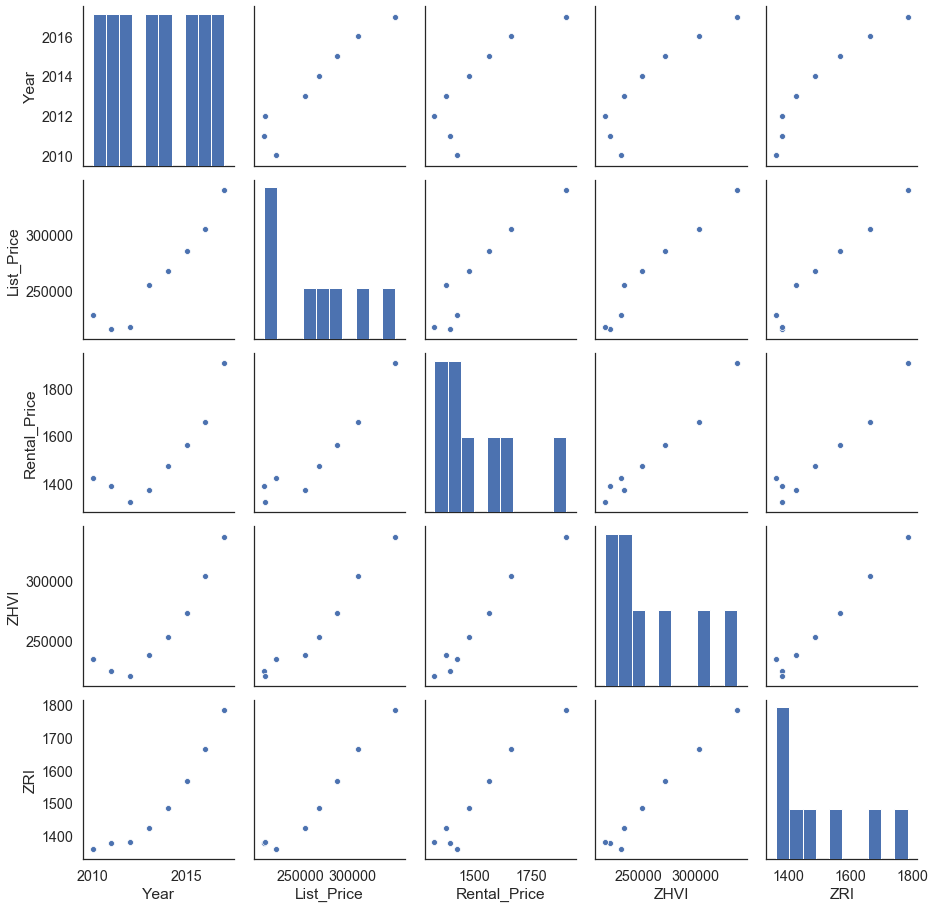

In [192]:
sns.pairplot(washington_data)

In [193]:
#evaluate relationship between List Price and average rental prices 
model2 = smf.ols('List_Price ~ Rental_Price', data=washington_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             List_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     44.25
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           0.000558
Time:                        12:22:08   Log-Likelihood:                -87.986
No. Observations:                   8   AIC:                             180.0
Df Residuals:                       6   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.732e+04   5.02e+04     -1.342      0.228    -1.9e+05    5.55e+04
Rental_Price   218.9486     32.914      6.652      0.001     138.412     299.485
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.641
Skew:                          -0.119   Prob(JB):                        0.726
Kurtosis:                       1.634   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

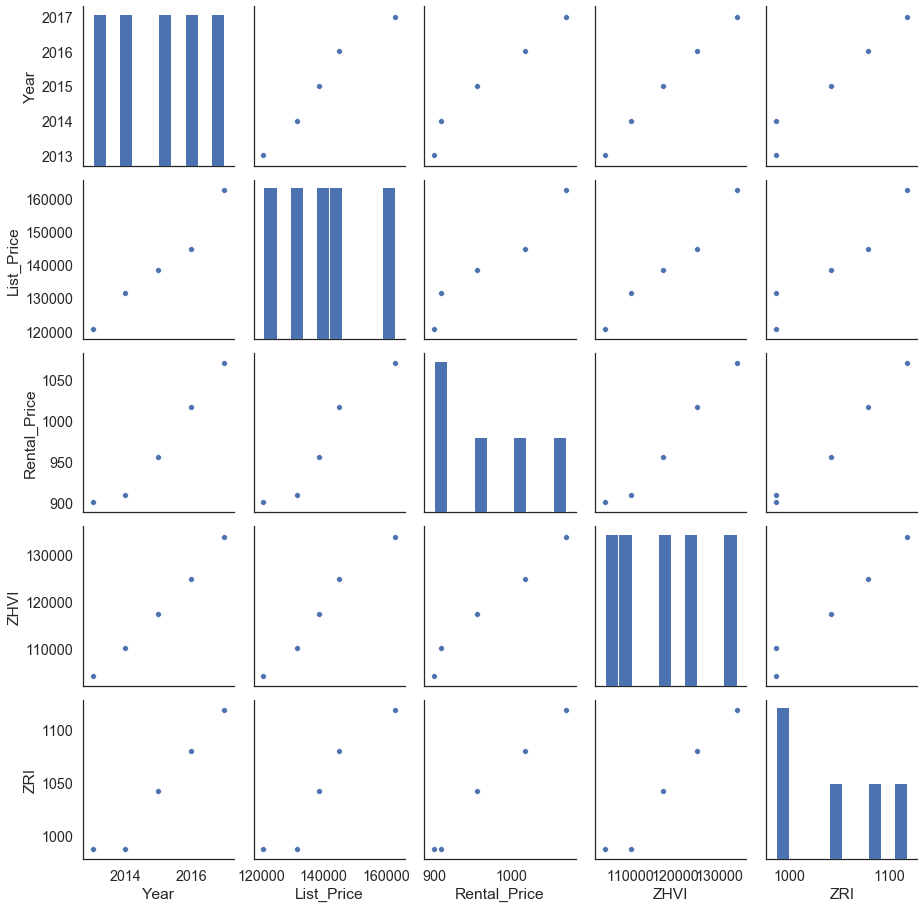

In [194]:
sns.pairplot(michigan_data)

In [195]:
#evaluate relationship between List Price and average rental prices 
model2 = smf.ols('List_Price ~ Rental_Price', data=michigan_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             List_Price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     40.72
Date:                Sun, 19 Apr 2020   Prob (F-statistic):            0.00779
Time:                        12:22:14   Log-Likelihood:                -48.154
No. Observations:                   5   AIC:                             100.3
Df Residuals:                       3   BIC:                             99.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.309e+04   3.18e+04     -1.981      0.142   -1.64e+05    3.83e+04
Rental_Price   208.9547     32.746      6.381      0.008     104.744     313.166
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.520
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.623
Skew:                          -0.204   Prob(JB):                        0.732
Kurtosis:                       1.319   Cond. No.                     1.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

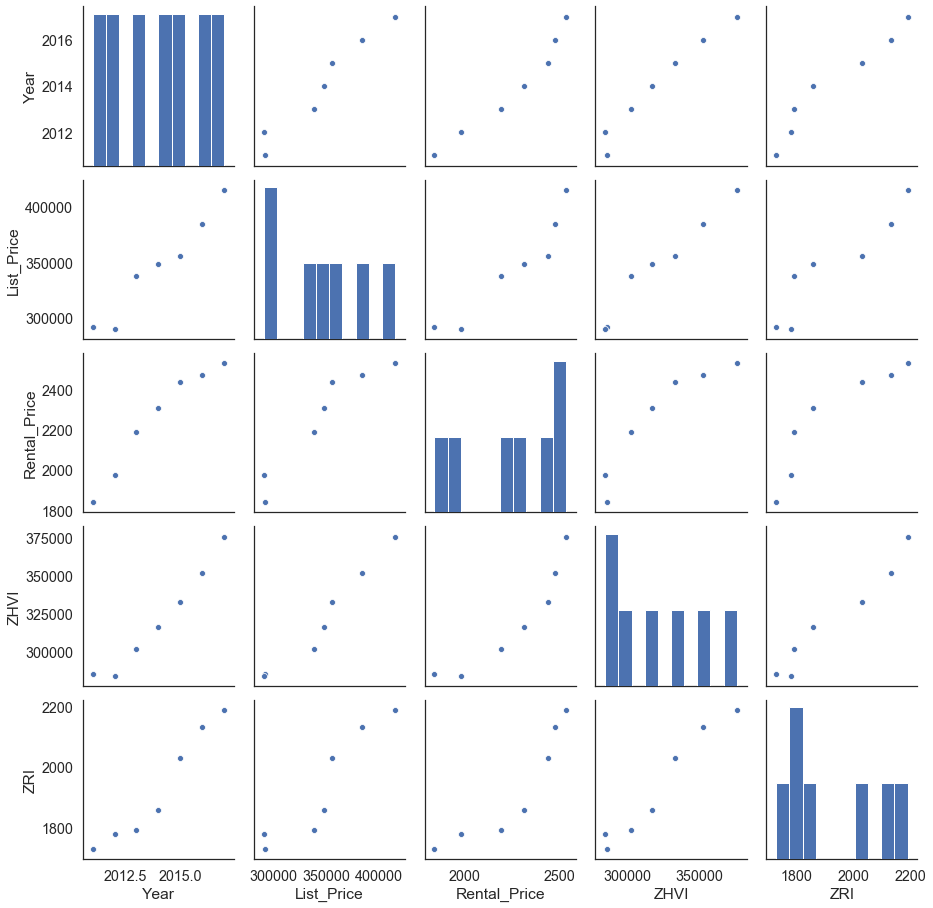

In [196]:
sns.pairplot(mass_data)

In [197]:
#evaluate relationship between List Price and average rental prices 
model2 = smf.ols('List_Price ~ Rental_Price', data=mass_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             List_Price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     42.05
Date:                Sun, 19 Apr 2020   Prob (F-statistic):            0.00130
Time:                        12:22:21   Log-Likelihood:                -76.608
No. Observations:                   7   AIC:                             157.2
Df Residuals:                       5   BIC:                             157.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.182e+04   5.71e+04     -0.382      0.718   -1.68e+05    1.25e+05
Rental_Price   163.4560     25.206      6.485      0.001      98.662     228.250
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.501
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.299
Skew:                           0.205   Prob(JB):                        0.861
Kurtosis:                       2.075   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

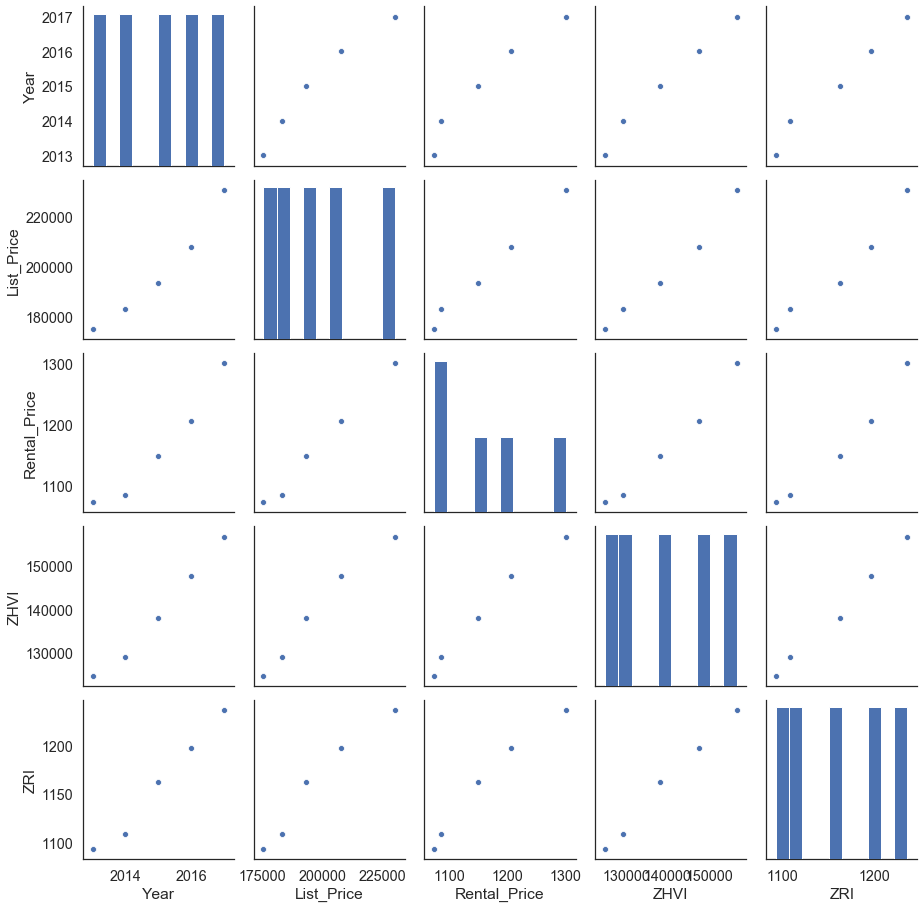

In [198]:
sns.pairplot(georgia_data)

In [199]:
#evaluate relationship between List Price and average rental prices 
model2 = smf.ols('List_Price ~ Rental_Price', data=georgia_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             List_Price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     366.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           0.000311
Time:                        12:22:27   Log-Likelihood:                -44.453
No. Observations:                   5   AIC:                             92.91
Df Residuals:                       3   BIC:                             92.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.171e+04   1.41e+04     -5.078      0.015   -1.17e+05   -2.68e+04
Rental_Price   231.8691     12.112     19.143      0.000     193.322     270.416
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.071
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.572
Skew:                           0.741   Prob(JB):                        0.751
Kurtosis:                       2.259   Cond. No.                     1.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Create Estimated Home Value and compare to Sales Price to Measure Fit of Model 

- Q4: Can we predict the home value (either List Price of Rental Price) given information provided by Zillow’s economic data science team?

In [200]:
statedata_final_price

,RegionName,List_Price,Rental_Price,ZHVI,ZRI,Year
8741,Alabama,158900.0,975.0,114700.0,949.0,2010
8744,Arkansas,139900.0,875.0,104500.0,799.0,2010
8747,Connecticut,279000.0,1700.0,246100.0,1662.0,2010
8749,DistrictofColumbia,307000.0,2150.0,363700.0,2199.0,2010
8755,Indiana,123500.0,1150.0,112500.0,1004.0,2010
...,...,...,...,...,...,...
13207,Virginia,289000.0,1600.0,246200.0,1538.0,2017
13208,Washington,349950.0,1900.0,351300.0,1842.0,2017
13209,WestVirginia,149900.0,980.0,103500.0,858.0,2017
13210,Wisconsin,189900.0,1150.0,169300.0,1179.0,2017


In [201]:
#explore clustering results - reformat data into state totals for clustering
statedata_final_price.set_index('RegionName',inplace=True)
aggregated_states = statedata_final_price.groupby('RegionName').mean()

In [202]:
#explore whether states can be clustered in a meaningful way 
model = AgglomerativeClustering(n_clusters=3) # selected 3 based on an estimation method (re-ran this later after using silhouette method
model.fit_predict(aggregated_states)
aggregated_states['cluster'] = model.labels_

In [203]:
#review cluster results 
aggregated_states

,List_Price,Rental_Price,ZHVI,ZRI,Year,cluster
RegionName,,,,,,
Alabama,167902.686047,937.831395,118711.627907,965.127907,2013.906977,2
Arizona,245161.400000,1234.980000,202316.000000,1230.420000,2015.400000,0
Arkansas,146916.331395,955.017442,109323.255814,901.895349,2013.906977,2
California,451017.520000,2283.230000,453474.000000,2268.460000,2015.400000,1
Colorado,310035.376543,1490.580247,260443.209877,1591.037037,2014.111111,0
Connecticut,279929.348837,1723.604651,238120.930233,1698.523256,2013.906977,0
Delaware,247737.270588,1274.429412,200191.764706,1347.600000,2013.952941,0
DistrictofColumbia,449782.098837,2467.250000,447673.255814,2474.918605,2013.906977,1
Florida,243434.160000,1653.480000,182094.000000,1465.360000,2015.400000,0


In [204]:
#import function from class notebook - credit to Chris Teplovs & Matthew Kallada for its creation
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

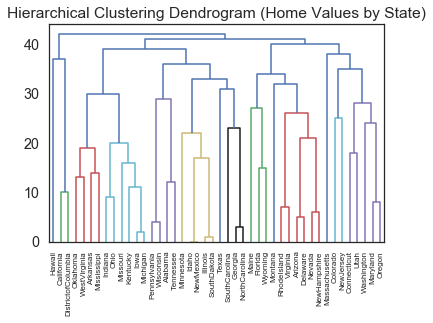

In [205]:
#generate dendrogram based on clustering results 
plt.title('Hierarchical Clustering Dendrogram (Home Values by State)')
plot_dendrogram(model,labels=aggregated_states.index.values)
plt.xticks(rotation=90)
plt.savefig('homevaluesbystate.pdf',format='pdf')
plt.show()

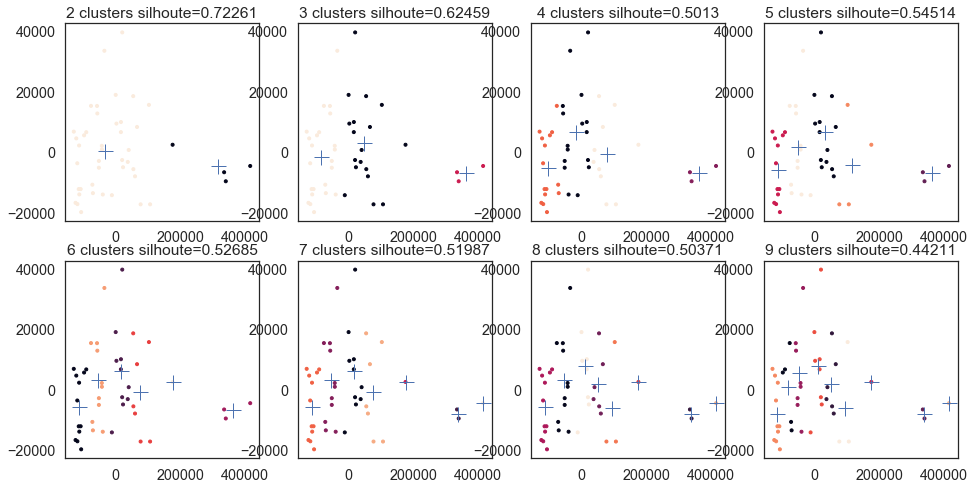

In [206]:
#using silhouette method, select best number of clusters to use 
pca = PCA(n_components=2).fit(aggregated_states)
data2d = pca.transform(aggregated_states)

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(aggregated_states)
    scores.append(kmean.score(aggregated_states))
    n_clusters.append(i)
    pred = kmean.predict(aggregated_states)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(aggregated_states, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

In [207]:
#run kmeans based on silhouette method # of clusters results 
kmeans = KMeans(n_clusters=2)
kmeans.fit(aggregated_states)
print("Labels:")
print(kmeans.labels_)

Labels:
[0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [208]:
#statedata_final_price.set_index(['RegionName', 'Year'])
statedata_final_price

,List_Price,Rental_Price,ZHVI,ZRI,Year
RegionName,,,,,
Alabama,158900.0,975.0,114700.0,949.0,2010
Arkansas,139900.0,875.0,104500.0,799.0,2010
Connecticut,279000.0,1700.0,246100.0,1662.0,2010
DistrictofColumbia,307000.0,2150.0,363700.0,2199.0,2010
Indiana,123500.0,1150.0,112500.0,1004.0,2010
...,...,...,...,...,...
Virginia,289000.0,1600.0,246200.0,1538.0,2017
Washington,349950.0,1900.0,351300.0,1842.0,2017
WestVirginia,149900.0,980.0,103500.0,858.0,2017


In [209]:
#split data in independent and dependent variables 
X = statedata_final_price[['Rental_Price', 'ZHVI', 'ZRI']].values
Y = statedata_final_price['List_Price'].values

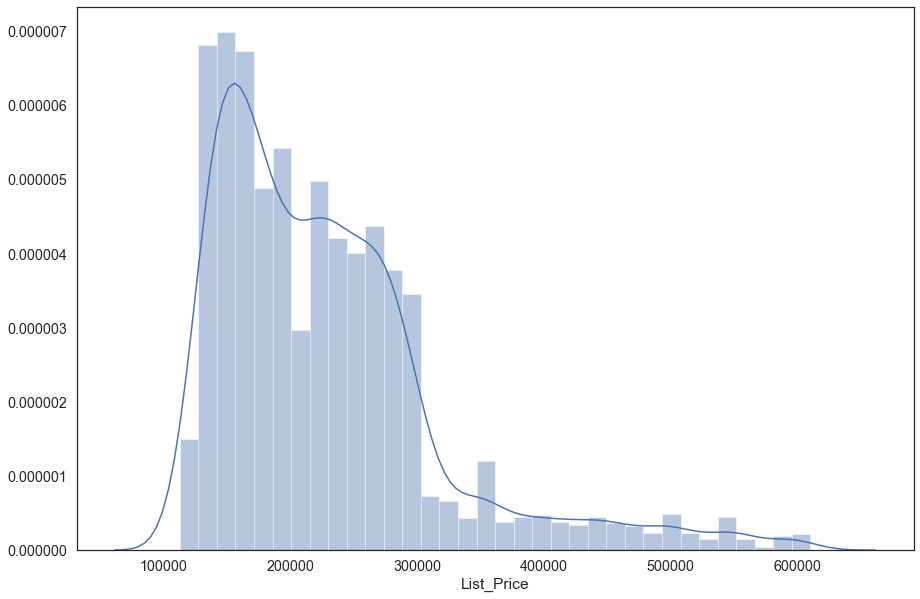

In [210]:
#evaluate the distribution of list price 
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(statedata_final_price['List_Price'])

In [211]:
#split into test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [212]:
#train model
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
#identify predicted values & compare against actuals
y_pred = reg.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df

,Actual,Predicted
0,223900.0,219137.574885
1,220500.0,254826.261185
2,123900.0,146615.951064
3,169000.0,201492.714738
4,272630.5,243116.560740
...,...,...
957,253995.0,220796.800185
958,135000.0,154859.119350
959,199900.0,181245.226752
960,449900.0,464280.632116


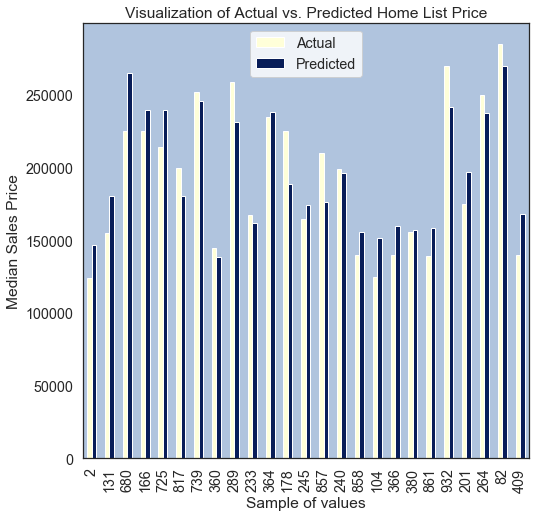

In [214]:
#visualize performance of model by plotting actual vs. predicted values for a sample
ax = comparison_df.sample(25).plot(kind='bar',figsize=(8,8), title='Visualization of Actual vs. Predicted Home List Price',
                                colormap='YlGnBu')
ax.set_xlabel('Sample of values')
ax.set_ylabel('Median Sales Price')
ax.set_facecolor("lightsteelblue")

In [215]:
# Evaluate model performance
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
explained_variance = explained_variance_score(y_test, y_pred)
mean_ab_error = mean_absolute_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
print('Explained Variance: {0:.2%}'.format((explained_variance)))
print('Mean Absolute Error: {0:}'.format((mean_ab_error)))
print('Mean Squared Error: {0:}'.format((mean_sq_error)))

Explained Variance: 93.28%
Mean Absolute Error: 17130.694571986794
Mean Squared Error: 494112959.67916715


In [216]:
# look at mean squared error for each model - shows how right or wrong you are on average - diff between your pred value & mean value squared (could be very large)
# if i call something accuracy, people will assume im talking about precision, so expl variance is not "accuracy"

In [217]:
#split data in independent and dependent variables - this time with rental price as dependent variable
X2 = statedata_final_price[['List_Price', 'ZHVI', 'ZRI', 'Year']].values
Y2 = statedata_final_price['Rental_Price'].values

In [218]:
#split into test and train data sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3)

In [219]:
#train model
reg = LinearRegression()  
reg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
#identify predicted values & compare against actuals
y_pred2 = reg.predict(X_test2)
comparison_df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
comparison_df2

,Actual,Predicted
0,1120.0,1176.378791
1,1550.0,1693.797957
2,1075.0,1136.645647
3,1250.0,1194.362168
4,1532.5,1499.707877
...,...,...
957,1400.0,1430.671546
958,1050.0,1103.695984
959,1000.0,881.283396
960,1400.0,1473.073526


In [221]:
# Evaluate model performance
from sklearn.metrics import explained_variance_score
explained_variance2 = explained_variance_score(y_test2, y_pred2)
mean_ab_error2 = mean_absolute_error(y_test, y_pred)
mean_sq_error2 = mean_squared_error(y_test, y_pred)
print('Explained Variance: {0:.2%}'.format((explained_variance2)))
print('Mean Absolute Error: {0:}'.format((mean_ab_error2)))
print('Mean Squared Error: {0:}'.format((mean_sq_error2)))

Explained Variance: 92.43%
Mean Absolute Error: 17130.694571986794
Mean Squared Error: 494112959.67916715


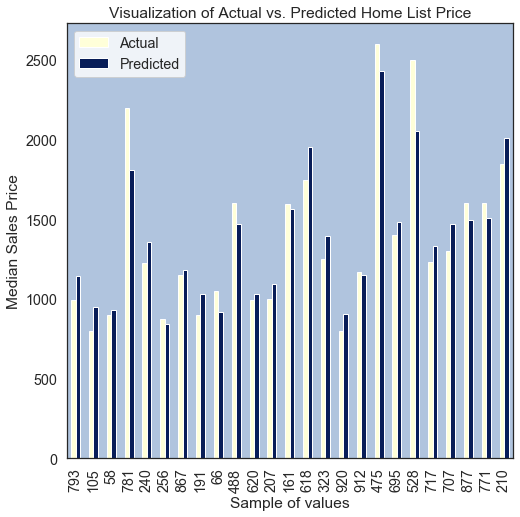

In [222]:
ax = comparison_df2.sample(25).plot(kind='bar',figsize=(8,8), title='Visualization of Actual vs. Predicted Home List Price',
                                colormap='YlGnBu')
ax.set_xlabel('Sample of values')
ax.set_ylabel('Median Sales Price')
ax.set_facecolor("lightsteelblue")